In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from env import get_db_url

#### Find all of the "Single Family Residential" properties from 2017.

In [4]:
sql = """
select 
bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt, taxamount, fips
from properties_2017
join propertylandusetype using (propertylandusetypeid)
where propertylandusedesc = "Single Family Residential"
"""

df = pd.read_sql(sql, get_db_url("zillow"))
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0


In [11]:
df.isna().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2152863 entries, 0 to 2152862
Data columns (total 7 columns):
 #   Column                        Dtype
---  ------                        -----
 0   bedroomcnt                    bool 
 1   bathroomcnt                   bool 
 2   calculatedfinishedsquarefeet  bool 
 3   taxvaluedollarcnt             bool 
 4   yearbuilt                     bool 
 5   taxamount                     bool 
 6   fips                          bool 
dtypes: bool(7)
memory usage: 14.4 MB


In [9]:
df.isna().sum()

bedroomcnt                        11
bathroomcnt                       11
calculatedfinishedsquarefeet    8484
taxvaluedollarcnt                493
yearbuilt                       9337
taxamount                       4442
fips                               0
dtype: int64

## % of NULLS

In [8]:
df.isna().mean()

bedroomcnt                      0.000005
bathroomcnt                     0.000005
calculatedfinishedsquarefeet    0.003941
taxvaluedollarcnt               0.000229
yearbuilt                       0.004337
taxamount                       0.002063
fips                            0.000000
dtype: float64

In [12]:
round(df.dropna().shape[0] / df.shape[0], 4)

0.9941

In [14]:
round(df.dropna().shape[0] / df.shape[0], 2)

0.99

#### dropping nulls leaves alot of data still avaliable

In [15]:
df.shape[0]

2152863

In [17]:
df = df.dropna()

In [20]:
df.columns.tolist()

['bedroomcnt',
 'bathroomcnt',
 'calculatedfinishedsquarefeet',
 'taxvaluedollarcnt',
 'yearbuilt',
 'taxamount',
 'fips']

In [21]:
for column in df.columns:
    print(column)
    print(df[column].value_counts())
    print("#######################")

bedroomcnt
3.0     962944
4.0     633608
2.0     334221
5.0     150671
6.0      25117
1.0      22895
7.0       4792
0.0       4397
8.0       1103
9.0        290
10.0       118
11.0        34
13.0        15
12.0        12
14.0         7
15.0         5
18.0         3
16.0         2
25.0         1
Name: bedroomcnt, dtype: int64
#######################
bathroomcnt
2.00     942463
3.00     422398
1.00     412582
2.50     142827
4.00      82039
1.50      31157
3.50      28464
5.00      28306
4.50      19474
6.00      10717
5.50       6201
7.00       4381
0.00       4274
8.00       1681
6.50       1330
9.00        707
7.50        382
10.00       322
11.00       145
8.50        108
12.00        73
9.50         50
13.00        39
14.00        25
15.00        17
0.50         16
10.50        14
16.00        12
18.00         8
20.00         6
17.00         4
1.75          3
12.50         3
11.50         3
19.50         1
14.50         1
32.00         1
19.00         1
Name: bathroomcnt, dtype: int

## We have some takeaways so 
* bedrooms are allowed to be int 
* bathrooms can stay a float to keep the halve values 

In [25]:
(df.calculatedfinishedsquarefeet == df.calculatedfinishedsquarefeet.astype(int)).mean()

1.0

In [26]:
(df.bathroomcnt == df.bathroomcnt.astype(int)).mean()

0.8925192794249229

In [27]:
df["fips"] = df["fips"].astype(int)
df["yearbuilt"] = df["yearbuilt"].astype(int)
df["bedroomcnt"] = df["bedroomcnt"].astype(int)
df["taxvaluedollarcnt"] = df["taxvaluedollarcnt"].astype(int)
df["calculatedfinishedsquarefeet"] = df["calculatedfinishedsquarefeet"].astype(int)

## Then we check to make sure the dtypes changed 

In [28]:
df.dtypes

bedroomcnt                        int64
bathroomcnt                     float64
calculatedfinishedsquarefeet      int64
taxvaluedollarcnt                 int64
yearbuilt                         int64
taxamount                       float64
fips                              int64
dtype: object

# Put in a WRANGLE.PY untill you can improve!

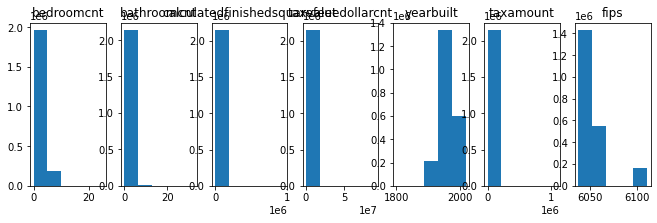

In [37]:
plt.figure(figsize=(16, 3))


for i, col in enumerate(df.columns):
    plot_number = i + 1 
    plt.subplot(1,10, plot_number)
    plt.title(col)
    df[col].hist(bins=5)
    plt.grid(False)

## This is not really readable

bedroomcnt


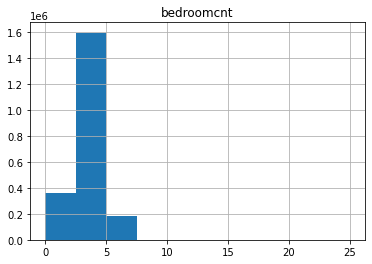

bathroomcnt


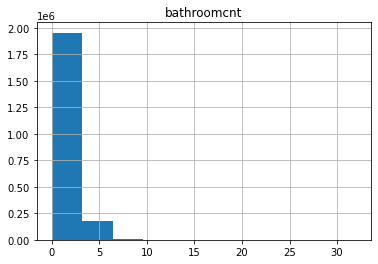

calculatedfinishedsquarefeet


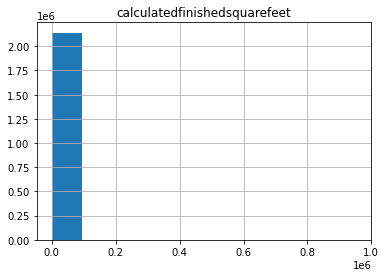

taxvaluedollarcnt


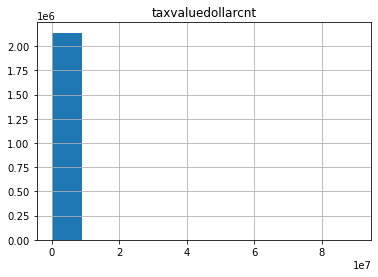

yearbuilt


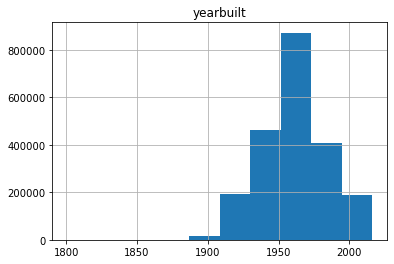

taxamount


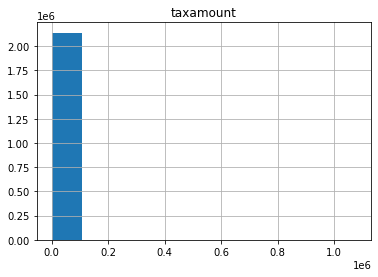

fips


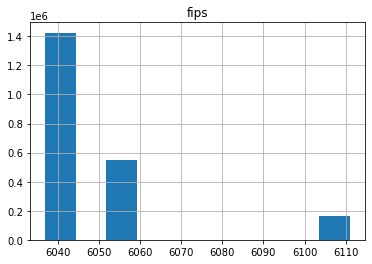

In [38]:
for col in df.columns:
    print(col)
    plt.title(col)
    df[col].hist()
    plt.show()

# ahhhhh, Alot better !

In [43]:
df.calculatedfinishedsquarefeet.sort_values(ascending=False).head(15).T

849924     952576
1689332    531118
1432166     63692
830510      59220
530834      52503
1327785     45891
401550      42831
1657947     39170
2080790     37634
430684      37472
1704145     35796
969038      35378
950854      35046
1517873     31653
1553812     31450
Name: calculatedfinishedsquarefeet, dtype: int64

In [46]:
df[df.calculatedfinishedsquarefeet >= 25_000]

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
32114,10,19.5,26345,11689668,1981,369.08,6059
154074,11,16.0,28954,11662596,1996,140614.03,6037
229363,6,7.0,27816,20192925,1993,242493.44,6037
401550,0,0.0,42831,29371867,2014,352319.61,6037
430684,3,1.0,37472,4003713,1956,13533.30,6037
433860,0,0.0,26072,12606834,1995,151740.30,6037
439746,0,0.0,29104,5222031,1986,62520.44,6059
463061,0,0.0,28609,424373,1953,93201.76,6037
523000,11,14.0,29678,33437863,1994,363213.73,6037
530834,11,16.0,52503,90188462,1990,1078101.87,6037


In [52]:
df[df.calculatedfinishedsquarefeet >= 25_000].taxvaluedollarcnt.mean()

21324849.826086957

In [55]:
df[df.bedroomcnt <= 6].sum()

bedroomcnt                      7.018658e+06
bathroomcnt                     4.759029e+06
calculatedfinishedsquarefeet    3.951775e+09
taxvaluedollarcnt               9.697443e+11
yearbuilt                       4.184402e+09
taxamount                       1.183158e+10
fips                            1.290623e+10
dtype: float64

In [56]:
df.bathroomcnt.sort_values(ascending=False).head(30)

1657947    32.0
1114403    20.0
2051558    20.0
26485      20.0
1174755    20.0
1618393    20.0
701366     20.0
32114      19.5
2135273    19.0
1758193    18.0
1553895    18.0
1273779    18.0
570561     18.0
1012171    18.0
253517     18.0
799516     18.0
1811787    18.0
572169     17.0
1671890    17.0
843041     17.0
1144383    17.0
818240     16.0
1432079    16.0
549141     16.0
1866663    16.0
154074     16.0
1151694    16.0
2138637    16.0
1316950    16.0
1090763    16.0
Name: bathroomcnt, dtype: float64

## Now we know how to check for outliers, we will know move to a manual method of detection and Filtering !!! 

#### we want to get our dataset as close to the norm of data as we can we dont want to enter the 50cents are jeff bozo in our data set. 

In [57]:
df[df.bathroomcnt <= 6].shape[0] / df.shape[0] # this will tell is a 
# percent of properties that have 6 of less toliet rooms the rest of the 
# will do the same for the desired data type 

0.9956481414424116

In [59]:
df[df.bedroomcnt <= 6].shape[0] / df.shape[0]

0.9970180844626875

In [60]:
df[df.taxvaluedollarcnt < 1_500_000].shape[0] / df.shape[0]

0.9673507815730515

In [61]:
from wrangle import wrangle_zillow


In [62]:
df = wrangle_zillow()

In [63]:
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
4,4,2.0,3633,296425,2005,6941.39,6037
6,3,4.0,1620,847770,2011,10244.94,6037
7,3,2.0,2077,646760,1926,7924.68,6037
11,0,0.0,1200,5328,1972,91.60,6037
14,0,0.0,171,6920,1973,255.17,6037


bedroomcnt


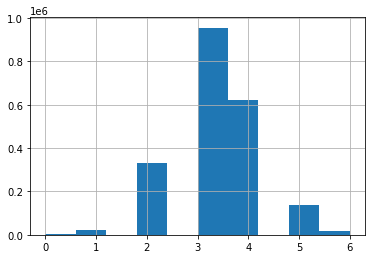

bathroomcnt


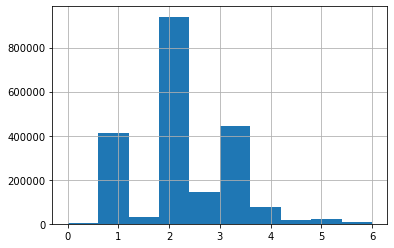

calculatedfinishedsquarefeet


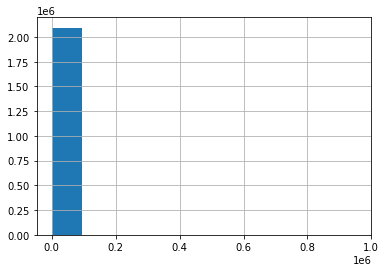

taxvaluedollarcnt


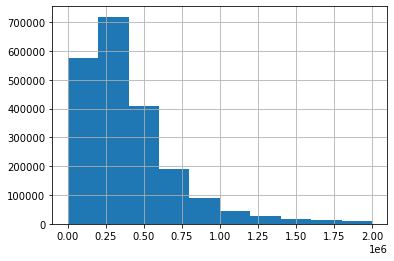

yearbuilt


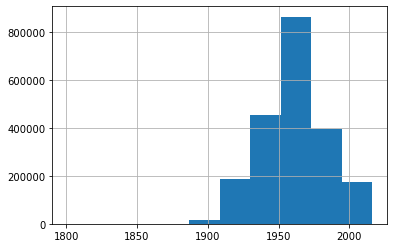

taxamount


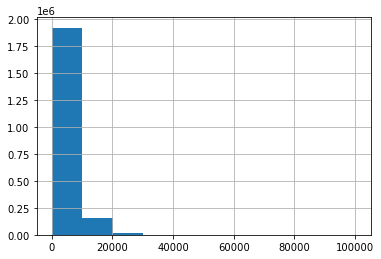

fips


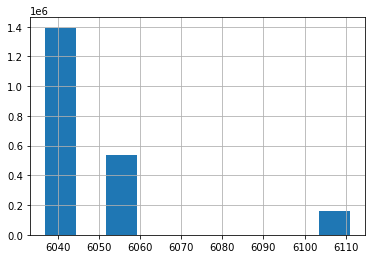

In [65]:
for col in df.columns:
    print(col)
    df[col].hist()
    plt.show()
